In [1]:
#pip install seaborn

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("Crop_recommendation.csv")

In [4]:
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
1692,117,86,48,28.695620,82.541958,6.225225,116.161684,banana
1693,114,94,53,26.335449,76.853201,6.190757,118.685826,banana
1694,110,78,50,25.937302,78.898644,5.915569,98.217475,banana
1695,94,70,48,25.136865,84.883944,6.195152,91.464425,banana


In [5]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [6]:
data.rename(columns = {'label' : 'crop_names'}, inplace = True)

In [7]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall',
       'crop_names'],
      dtype='object')

In [8]:
data

,N,P,K,temperature,humidity,ph,rainfall,crop_names
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
1692,117,86,48,28.695620,82.541958,6.225225,116.161684,banana
1693,114,94,53,26.335449,76.853201,6.190757,118.685826,banana
1694,110,78,50,25.937302,78.898644,5.915569,98.217475,banana
1695,94,70,48,25.136865,84.883944,6.195152,91.464425,banana


In [9]:
data.isnull().sum().sum()

0

In [10]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000
mean,52.647024,58.126105,52.031232,24.711674,65.848856,6.438962,99.364935
std,38.536964,34.164342,57.068796,4.910428,24.432640,0.870411,50.436396
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,5.314507
25%,21.000000,36.000000,19.000000,21.631491,51.278688,5.861399,66.838723
50%,37.000000,54.000000,27.000000,24.910323,77.906210,6.354007,93.123306
75%,90.000000,72.000000,52.000000,27.834871,83.856427,6.932537,115.356032
max,140.000000,145.000000,205.000000,41.948657,94.964199,9.935091,298.560117


In [11]:
data.crop_names.unique()

array(['rice', 'maize', 'Soyabeans', 'beans', 'peas', 'groundnuts',
       'cowpeas', 'banana', 'mango', 'grapes', 'watermelon', 'apple',
       'orange', 'cotton', 'coffee'], dtype=object)

In [12]:
data.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.245443,-0.199120,0.003268,0.242780,0.119566,0.126947
P,-0.245443,1.000000,0.822431,-0.161702,0.027050,-0.255942,-0.020124
K,-0.199120,0.822431,1.000000,-0.165350,0.205490,-0.148136,-0.066860
temperature,0.003268,-0.161702,-0.165350,1.000000,0.211219,-0.106763,-0.056895
humidity,0.242780,0.027050,0.205490,0.211219,1.000000,0.012881,-0.008299
ph,0.119566,-0.255942,-0.148136,-0.106763,0.012881,1.000000,-0.104514
rainfall,0.126947,-0.020124,-0.066860,-0.056895,-0.008299,-0.104514,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

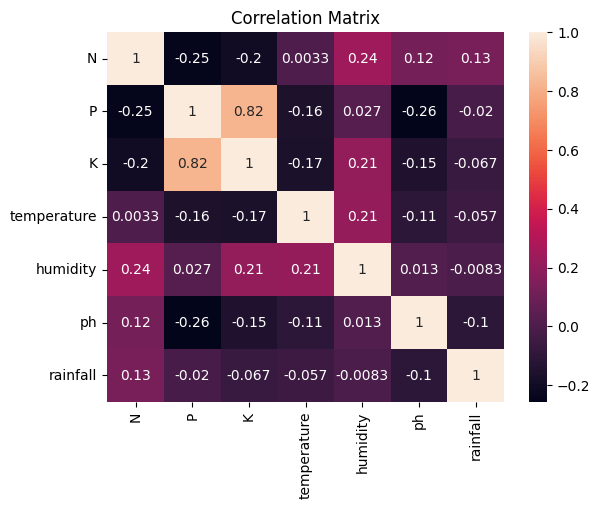

In [13]:
sns.heatmap(data.corr(), annot =True)
plt.title('Correlation Matrix')

In [14]:
X = data[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = data['crop_names']

In [15]:
target

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
1692    banana
1693    banana
1694    banana
1695    banana
1696    banana
Name: crop_names, Length: 1697, dtype: object

In [16]:
y = target
y

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
1692    banana
1693    banana
1694    banana
1695    banana
1696    banana
Name: crop_names, Length: 1697, dtype: object

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 30)

In [18]:
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (1357, 7)
X_test shape: (340, 7)
y_train shape: (1357,)
y_test shape: (340,)


In [19]:
X_train

,N,P,K,temperature,humidity,ph,rainfall
687,19,39,17,29.280862,81.800924,6.890156,44.474274
1270,31,5,14,17.665454,91.698659,6.583412,110.685751
560,22,55,24,28.568006,57.306360,8.660780,64.530276
131,63,43,19,18.518168,55.531281,6.641906,90.988051
1371,102,37,25,25.314685,77.917571,5.907931,72.829021
...,...,...,...,...,...,...,...
919,4,136,204,29.937076,81.777135,5.898944,65.522793
1164,17,136,196,23.871923,90.499390,5.882156,103.054809
500,3,49,18,27.910952,64.709306,3.692864,32.678919
941,36,128,204,25.235423,80.687005,5.695793,67.038409


In [20]:
X_test

,N,P,K,temperature,humidity,ph,rainfall
1402,83,38,35,25.708227,52.886671,7.189156,136.732509
197,60,54,19,18.748267,62.498785,6.417820,70.234016
209,28,74,81,18.012723,18.309681,8.753795,81.985688
119,74,55,19,18.050337,62.893670,6.288868,84.236135
927,5,126,197,12.800004,81.208764,6.417501,67.104394
...,...,...,...,...,...,...,...
1335,115,48,16,25.543597,84.092298,7.175935,88.942455
1068,89,22,52,24.896811,86.107829,6.217301,53.146262
1211,33,12,8,25.260527,90.311537,6.822282,117.369530
1561,86,76,54,30.215908,80.415857,4.926825,90.109781


In [21]:
y_train

687        cowpeas
1270        orange
560     groundnuts
131          maize
1371        cotton
           ...    
919         grapes
1164         apple
500     groundnuts
941         grapes
421           peas
Name: crop_names, Length: 1357, dtype: object

# Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)


In [24]:
%%time
rf.fit(X_train, y_train)

CPU times: total: 453 ms
Wall time: 281 ms


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [25]:
rf.oob_score_

0.9985261606484893

In [26]:
y_pred = rf.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy_score(y_test,y_pred) 

1.0

In [29]:
data

,N,P,K,temperature,humidity,ph,rainfall,crop_names
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
1692,117,86,48,28.695620,82.541958,6.225225,116.161684,banana
1693,114,94,53,26.335449,76.853201,6.190757,118.685826,banana
1694,110,78,50,25.937302,78.898644,5.915569,98.217475,banana
1695,94,70,48,25.136865,84.883944,6.195152,91.464425,banana


In [30]:
import pickle

In [31]:
with open('../models/crop_rec/rf_model.pkl','wb') as f:
    pickle.dump(rf,f)

# KNN

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [34]:
X_s_train = scaler.fit_transform(X_train)
X_s_test = scaler.fit_transform(X_test)

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
knn = KNeighborsClassifier(n_neighbors = 15,metric='minkowski',p=2)
knn.fit(X_s_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [37]:
y_k_pred = knn.predict(X_s_test)

In [38]:
result2 = accuracy_score(y_test,y_k_pred)
print("Accuracy:",result2)

Accuracy: 0.9882352941176471


In [39]:
with open('../models/crop_rec/knn_model.pkl','wb') as f:
    pickle.dump(knn,f)

# SVM

In [40]:
from sklearn.svm import SVC

In [41]:
svm = SVC(kernel='linear', random_state=0)  
svm.fit(X_s_train, y_train)  

SVC(kernel='linear', random_state=0)

In [42]:
y_s_pred= svm.predict(X_s_test)  

In [43]:
print(accuracy_score(y_test,y_s_pred))

0.9941176470588236


In [44]:
with open('../models/crop_rec/svm_model.pkl','wb') as f:
    pickle.dump(svm,f)

# Test with data

In [45]:
custom = np.array([[117,86,48,29,83,6,116]])

In [46]:
custom_results_rf = rf.predict(custom)

In [47]:
custom_results_knn = knn.predict(custom)

In [48]:
custom_results_svm = svm.predict(custom)

In [49]:
print("Prediction for RF: {}".format(custom_results_rf[0]))

Prediction for RF: banana


In [50]:
print("Prediction for KNN: {}".format(custom_results_knn[0]))

Prediction for KNN: rice


In [51]:
print("Prediction for SVM: {}".format(custom_results_svm[0]))

Prediction for SVM: apple
